# 第2章 感知机

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}log\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} \left(y_{i}log\left(w \cdot x_{i}+b\right) + \left(1-y_{i}\right)log\left(1-\left(w\cdot x{i} + b\right)\right)\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

for b, we just add 1 to vector x : $\left[ x, 1 \right]$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [25]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
print(df.shape)
df.label.value_counts()

(150, 5)


2    50
1    50
0    50
Name: label, dtype: int64

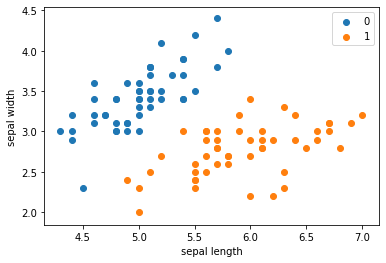

In [26]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [54]:
data = np.array(df.iloc[:100, [0, 1, -1]])
data.shape

(100, 3)

In [165]:
X, y = data[:,:-1], data[:,-1]

In [166]:
y = np.array([1 if i == 1 else 0 for i in y])

In [91]:
X[0]

array([5.1, 3.5])

In [185]:
class Model():
    def __init__(self, n, rate):
        self.w = np.random.rand(n)
        self.b = 0
        self.l_rate = rate;
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        y = 1 / (1 + np.exp(-y))
        return y

    # stochastic gradient descent
    def fit(self, X_train, y_train, M):
        while M > 0:
            for d in range(len(X_train)):
                #size = len(X_train)
                x = X_train[d];
                y = y_train[d];
                y_e = self.sign(x, self.w,self.b);
                self.w = self.w + self.l_rate * np.dot((y - y_e),x);
                self.b = self.b + self.l_rate * np.dot((y - y_e), 1);
            M = M - 1;
        return 'Perceptron Model!'

    def score(self):
        pass

## Perceptron

In [188]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model():
    def __init__(self, n, rate):
        self.w = np.random.rand(n)
        self.b = 0
        self.l_rate = rate;
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        y = 1 / (1 + np.exp(-y))
        return y

    # gradient descent
    def fit(self, X_train, y_train, M):
        while M > 0:
            #for d in range(len(X_train)):
            size = len(X_train)
            x = X_train;
            y = y_train;
            y_e = self.sign(x, self.w,self.b);
            self.w = self.w + self.l_rate * np.dot((y - y_e),x) / size;
            self.b = self.b + self.l_rate * np.dot((y - y_e), np.ones(len(x))) / size;
            M = M - 1;
        return 'Perceptron Model!'

    def score(self):
        pass

In [189]:
n = len(X[0])
perceptron = Model(n, 0.2)
perceptron.fit(X, y,1000)

'Perceptron Model!'

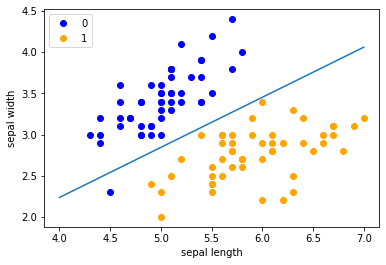

In [190]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [184]:
perceptron.w[0]
#perceptron.b

1.0218368006550105

### scikit-learn实例

In [162]:
import sklearn
from sklearn.linear_model import Perceptron

In [163]:
sklearn.__version__

'0.21.3'

In [167]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


In [169]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-5.]


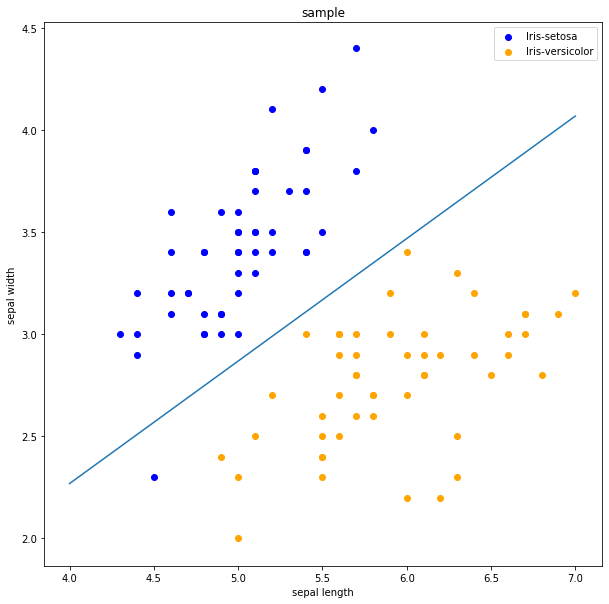

In [170]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('sample')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

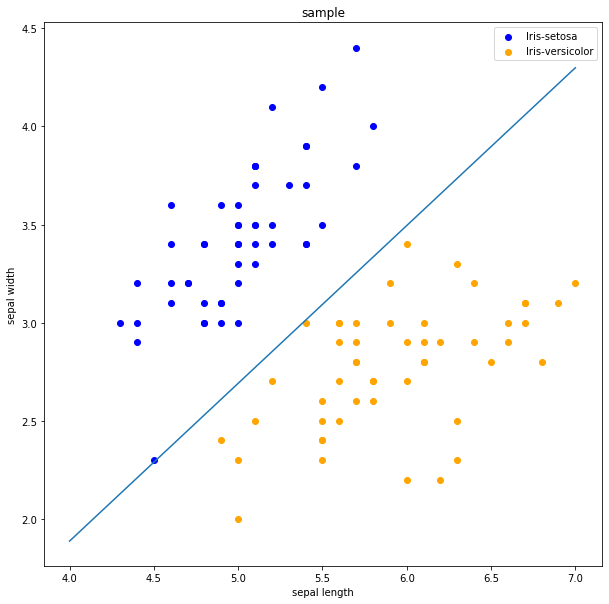

In [175]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('sample')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)

In [156]:
m = np.array([1,2])
m

array([1, 2])

In [157]:
x = np.array([1,1])

In [158]:
y = np.dot(m,x)

In [159]:
y

3

In [65]:
1 / (1+np.exp([1,2]))

array([0.26894142, 0.11920292])

In [89]:
np.ones(2)

array([1., 1.])

In [113]:
np.random.rand(1)

array([0.72284342])